# Assignment 3: Classification with Logistic Regression

## Instructions

* Complete the assignment as outlined below.
* Restart your kernel and rerun your cells before submission.
* Submit your completed notebook (.ipynb).

## Dataset Information

The dataset contains health-related data for predicting diabetes. Below are the features:

* `Pregnancies`: Number of pregnancies
* `Glucose`: Plasma glucose concentration
* `BloodPressure`: Diastolic blood pressure (mm Hg)
* `SkinThickness`: Triceps skin fold thickness (mm)
* `Insulin`: 2-hour serum insulin (mu U/ml)
* `BMI`: Body mass index
* `DiabetesPedigreeFunction`: Diabetes pedigree function
* `Age`: Age (years)
* `Outcome`: Target variable (1 = Diabetes, 0 = No Diabetes)

Your goal in this homework is to train a first model for predicting the probability that a patient has diabetes given their healthcare data.

In [1]:
# Suggested packages, you can add more if you think they are necessary.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline

# Plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Download the data. Uncomment if using Colab.
!gdown https://drive.google.com/uc?id=1-_YcEl0q5LsDXRq5eix9K4gjSq78Ffd5

Downloading...
From: https://drive.google.com/uc?id=1-_YcEl0q5LsDXRq5eix9K4gjSq78Ffd5
To: /content/diabetes.csv
100% 23.1k/23.1k [00:00<00:00, 43.4MB/s]


## Question 1:

1. Load the dataset `diabetes.csv` and display the first 5 rows.
2. Print out all columns in the dataset and identify any missing values.
3. Show the descriptive statistics of the data.

In [3]:
# Load the dataset
dataset = pd.read_csv('diabetes.csv')
dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Report number of null values
print(dataset.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
# Show descriptive statistics
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Question 2:

What is the baseline accuracy for this classification problem? Baseline accuracy is the accuracy of always predicting the most common class. You can assume there are no outliers in the data.

In [9]:
# Question 2 code

posrate = dataset['Outcome'].value_counts()[1]/len(dataset)
baselineacc = 1 - posrate
print(baselineacc)

0.6510416666666667


## Question 3:

Split the data into training and testing sets. Use 70% of the data for training and 30% for testing. Pass `random_state = 42` to `train_test_split`. Ensure the `Outcome` column is the response variable. Report the descriptive statistics of X_train and X_test.

In [15]:
# Question 3 code

# Split data, train logistic regression. 30% of data will be used for testing
X_train, X_test, ytrain, ytest = train_test_split(
    dataset.drop('Outcome', axis=1),
    dataset['Outcome'],
    test_size=0.3,
    random_state=42
)

# Show the descriptive stats
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,3.726257,120.849162,69.685289,20.432030,79.836127,31.975605,0.469920,33.074488
std,3.262965,32.339523,18.094374,15.490715,115.196730,7.624495,0.342087,11.685319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,26.800000,0.241000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.374000,29.000000
75%,6.000000,139.000000,80.000000,32.000000,129.000000,36.500000,0.612000,41.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000


**Written question: Are the descriptive statistics of the X_train and X_test datasets similar? Is this a reasonable dataset for the problem?**

Test set statistic below**

The descriptive statistics of the training and test sets are relatively similar in terms of mean and standard deviation

It is a reasonable pair of datasets

In [16]:
X_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,4.121212,121.000000,67.757576,20.779221,79.714286,32.032035,0.476424,33.627706
std,3.597467,31.171894,21.994508,17.009171,115.604068,8.474243,0.305519,11.949165
min,0.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000
25%,1.000000,97.500000,62.000000,0.000000,0.000000,28.350000,0.245500,24.000000
50%,3.000000,115.000000,72.000000,24.000000,18.000000,32.700000,0.370000,29.000000
75%,7.000000,145.000000,78.000000,33.000000,126.000000,36.800000,0.666000,41.000000
max,13.000000,197.000000,114.000000,99.000000,680.000000,57.300000,1.600000,67.000000


**Written answer:**

## Question 4:

1. Create a pipeline that first standardizes the data using a z-scale transform, and then trains an instance of `LogisticRegression` with `penalty = None` and `max_iter = 1000`. Use the same random seed you used before.
2. Train the pipeline using the training set.

In [18]:
# Question 4 code
# Create a pipeline that scales the features and trains a logistic regression model

features_to_transform = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

transform_numbers = Pipeline([
    ('scaler', StandardScaler())
])

logit_pipeline = Pipeline([
    ('transform_numbers', transform_numbers),
    ('logit', LogisticRegression(penalty= None, max_iter = 1000, random_state = 42))
])

# Train the pipeline
logit_pipeline.fit(X_train, ytrain)

Pipeline(steps=[('transform_numbers',
                 Pipeline(steps=[('scaler', StandardScaler())])),
                ('logit',
                 LogisticRegression(max_iter=1000, penalty=None,
                                    random_state=42))])

## Question 5:

1. Compute the model’s accuracy on the training and testing sets.
2. Display the model’s coefficients and intercept.

In [19]:
# Display coefficients
# Get the training parameters in a dataframe with the corresponding feature names
training_params = pd.DataFrame(logit_pipeline.named_steps['logit'].coef_, columns=X_train.columns)


# Get the intercept of the logistic regression model
training_params['intercept'] = logit_pipeline.named_steps['logit'].intercept_
training_params


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,intercept
0,0.189248,1.158555,-0.195736,-0.024346,-0.113367,0.831144,0.14431,0.420137,-0.887076


In [20]:
# Calculate accuracy
print(accuracy_score(ytest, logit_pipeline.predict(X_test)))




0.7359307359307359


## Question 6:

1. Plot the ROC curve for the logistic regression model using the testing set. Make sure your plot includes a title and properly labeled axes.
2. Compute the area under the curve (AUC). Report the AUC at the top-left of your plot.

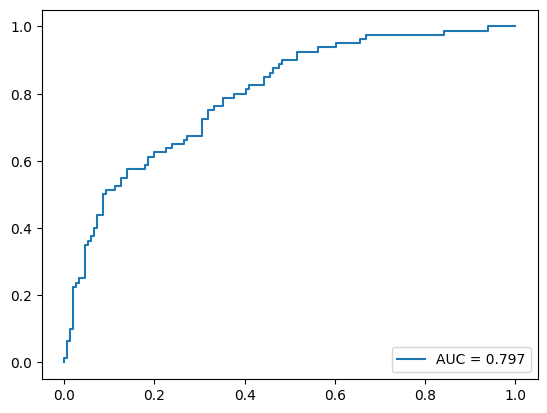

In [23]:
# Question 6 code
# Compute probabilities

fpr, tpr, thresholds = roc_curve(ytest, logit_pipeline.predict_proba(X_test)[:,1])

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(ytest, logit_pipeline.predict_proba(X_test)[:,1]), 3)
# Plot ROC curve
plt.plot(fpr,tpr,label=f"AUC = {auc:.3f}")
plt.legend(loc=4)
plt.show()





**Written question: Comment on the capacity of the model to predict the outcome. Is the AUC acceptable?**

**Written answer:**
The ROC curve is good as seen with the area underneath being fairly large.

Because the AUC is larger than 0.5, it is acceptable and shows the model to be good.


